In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Download Google stock data (GOOG) for the last 5 years
print("Downloading stock data...")
data = yf.download('GOOG', start='2018-01-01', end='2024-01-01')
data_close = data[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_close)

In [4]:
# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)


In [5]:
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Reshape input for RNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [6]:
# Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the RNN model
model = Sequential([
    SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
print("Training the model...")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Training the model...
Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1673 - val_loss: 0.0030
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.1349e-04 - val_loss: 0.0018
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.6344e-04 - val_loss: 0.0017
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━

In [8]:
# Predict
print("Predicting stock prices...")
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

Predicting stock prices...
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


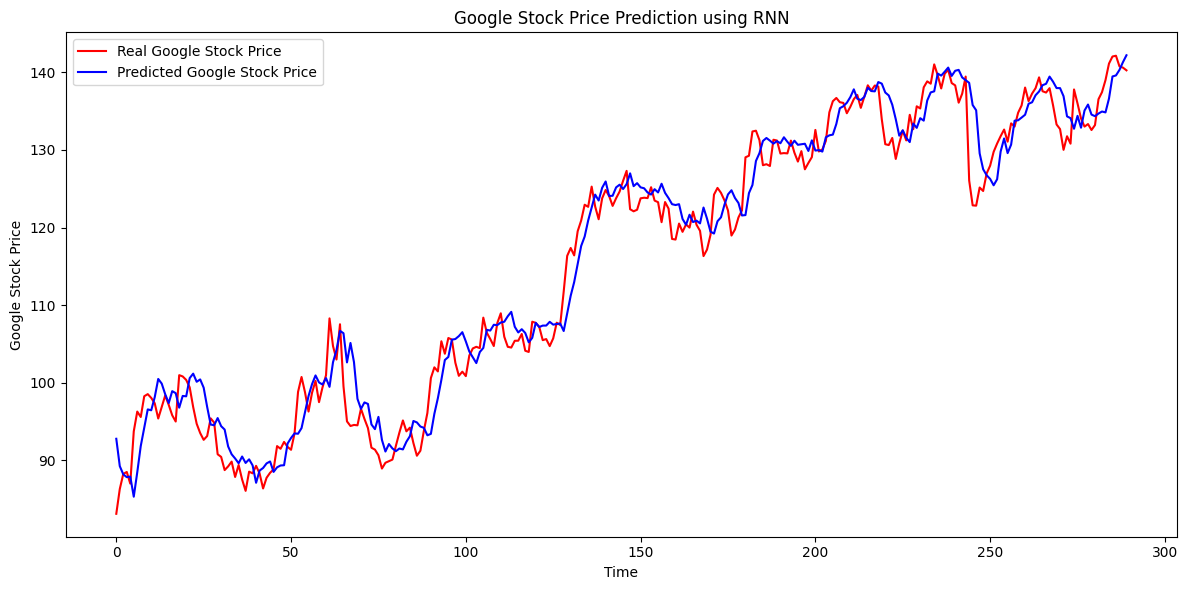

In [9]:
# Plotting results
plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.tight_layout()
plt.show()